# Programmieren mit Python (DLMDWPMP01)

# Studiengang: Master of Science - Data Science

# Vorgelegt von: Manuel Piroth

# E-Mail: manuel.piroth@iu-study.org

# Matrikelnummer: 9200097 

# Tutor: Stephan Führer

# Wissenschaftliche Leitung: Prof. Dr. Kamal Bhattacharya

In [1]:
# Zur Programmausführung: Alle Zellen müssen nacheinander ausgeführt werden.

### 1. Bibliotheken importieren

In [43]:
# Datenbank
import csv
import sqlalchemy as db

# Datenverarbeitung
import pandas as pd
import numpy as np
from numpy import arange

# Datenvisualisierung
import matplotlib.pyplot as plt

### 2. Globale Variablen

In [3]:
"""
Die CSV-Dateien
 - train.csv
 - test.csv
 - ideal.csv
müssen sich im selben Verzeichnis dieser Programmdatei befinden.
Dies sind die Variablen für die Dateipfade der Daten in den CSV-Dateien.
"""
pfad_Trainingsdatensatz = 'train.csv'
pfad_Testdatensatz = 'test.csv'
pfad_Funktionsdatensatz = 'ideal.csv'

### 3. CSV-Dateien Existenz

In [4]:
"""
Ausnahmebehandlungen um die Existenz der CSV-Dateien zu prüfen.
"""
class CSV_Dateien_Existenz:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, dateipfad_Train, dateipfad_Test, dateipfad_Ideal):
        
        # Variablen für den Pfad der CSV-Dateien
        self.Dateipfad_Train = dateipfad_Train
        self.Dateipfad_Test = dateipfad_Test
        self.Dateipfad_Ideal = dateipfad_Ideal

    # Klassen-Methode zum prüfen ob die CSV-Datei train.csv vorhanden ist
    def prüfe_Datei_Existenz_TrainCSV(self):
        try:
            with open(self.Dateipfad_Train, 'r') as f:
                return print(self.Dateipfad_Train, "ist vorhanden!")
        except FileNotFoundError as e:
            return False
        except IOError as e:
            return False
    
    # Klassen-Methode zum prüfen ob die CSV-Datei test.csv vorhanden ist
    def prüfe_Datei_Existenz_TestCSV(self):
        try:
            with open(self.Dateipfad_Test, 'r') as f:
                return print(self.Dateipfad_Test, "ist vorhanden!")
        except FileNotFoundError as e:
            return False
        except IOError as e:
            return False
    
    # Klassen-Methode zum prüfen ob die CSV-Datei ideal.csv vorhanden ist
    def prüfe_Datei_Existenz_IdealCSV(self):
        try:
            with open(self.Dateipfad_Ideal, 'r') as f:
                return print(self.Dateipfad_Ideal, "ist vorhanden!")
        except FileNotFoundError as e:
            return False
        except IOError as e:
            return False

##### 3.1 Prüfen ob die drei CSV-Dateien vorhanden sind

In [5]:
# Objekt der Klasse CSV_Dateien_Existenz erstellen
CSV_Dateien_Existenz_objekt = CSV_Dateien_Existenz(pfad_Trainingsdatensatz, 
                                                   pfad_Testdatensatz, 
                                                   pfad_Funktionsdatensatz)

# Die Klassen-Methoden der Klasse CSV_Dateien_Existenz aufrufen
CSV_Dateien_Existenz_objekt.prüfe_Datei_Existenz_TrainCSV()
CSV_Dateien_Existenz_objekt.prüfe_Datei_Existenz_TestCSV()
CSV_Dateien_Existenz_objekt.prüfe_Datei_Existenz_IdealCSV()

train.csv ist vorhanden!
test.csv ist vorhanden!
ideal.csv ist vorhanden!


### 4. Datenbank für die Trainingsdaten und die idealen Funktionen 

In [6]:
"""
Klasse für die Erstellung der beiden SQLite-Datenbanken Train.db und Funktionen.db und dessen Befüllung.
"""
class Datenbank_Train_Ideal():
    
    # Konstruktor um die Variablen initialisieren
    def __init__(self, 
                 pfad_Trainingsdatensatz,      
                 pfad_Funktionsdatensatz):
        
        # Variablen für die Dateipfade der Daten in den CSV-Dateien
        self.Pfad_Trainingsdaten = pfad_Trainingsdatensatz
        self.Pfad_Funktionsdaten = pfad_Funktionsdatensatz
        
        # Engine-Objekte erzeugen
        self.engine_Train = db.create_engine('sqlite:///Train.db')   
        self.engine_Funktionen = db.create_engine('sqlite:///Funktionen.db')  
        
        # Verbindungsobjekte erzeugen  
        self.connection_Train = self.engine_Train.connect()
        self.connection_Funktionen = self.engine_Funktionen.connect()
        
        # Metadaten-Objekt erzeugen
        self.meta_data_Train = db.MetaData()
        self.meta_data_Funktionen = db.MetaData()
        
        # Datenbankstruktur für Train.db
        self.Train = db.Table("Train", self.meta_data_Train,
                     db.Column("x", db.Float, nullable=False),
                     db.Column("y1", db.Float, nullable=False),
                     db.Column("y2", db.Float, nullable=False),
                     db.Column("y3", db.Float, nullable=False),
                     db.Column("y4", db.Float, nullable=False))
        
        # Datenbankstruktur für Funktionen.db
        self.Funktionen = db.Table("Funktionen", self.meta_data_Funktionen,
                          db.Column("x", db.Float, nullable=False),
                          db.Column("y1", db.Float, nullable=False),
                          db.Column("y2", db.Float, nullable=False),
                          db.Column("y3", db.Float, nullable=False),
                          db.Column("y4", db.Float, nullable=False),
                          db.Column("y5", db.Float, nullable=False),
                          db.Column("y6", db.Float, nullable=False),
                          db.Column("y7", db.Float, nullable=False),
                          db.Column("y8", db.Float, nullable=False),
                          db.Column("y9", db.Float, nullable=False),
                          db.Column("y10", db.Float, nullable=False),
                          db.Column("y11", db.Float, nullable=False),
                          db.Column("y12", db.Float, nullable=False),
                          db.Column("y13", db.Float, nullable=False),
                          db.Column("y14", db.Float, nullable=False),
                          db.Column("y15", db.Float, nullable=False),
                          db.Column("y16", db.Float, nullable=False),
                          db.Column("y17", db.Float, nullable=False),
                          db.Column("y18", db.Float, nullable=False),
                          db.Column("y19", db.Float, nullable=False),
                          db.Column("y20", db.Float, nullable=False),
                          db.Column("y21", db.Float, nullable=False),
                          db.Column("y22", db.Float, nullable=False),
                          db.Column("y23", db.Float, nullable=False),
                          db.Column("y24", db.Float, nullable=False),
                          db.Column("y25", db.Float, nullable=False),
                          db.Column("y26", db.Float, nullable=False),
                          db.Column("y27", db.Float, nullable=False),
                          db.Column("y28", db.Float, nullable=False),
                          db.Column("y29", db.Float, nullable=False),
                          db.Column("y30", db.Float, nullable=False),
                          db.Column("y31", db.Float, nullable=False),
                          db.Column("y32", db.Float, nullable=False),
                          db.Column("y33", db.Float, nullable=False),
                          db.Column("y34", db.Float, nullable=False),
                          db.Column("y35", db.Float, nullable=False),
                          db.Column("y36", db.Float, nullable=False),
                          db.Column("y37", db.Float, nullable=False),
                          db.Column("y38", db.Float, nullable=False),
                          db.Column("y39", db.Float, nullable=False),
                          db.Column("y40", db.Float, nullable=False),
                          db.Column("y41", db.Float, nullable=False),
                          db.Column("y42", db.Float, nullable=False),
                          db.Column("y43", db.Float, nullable=False),
                          db.Column("y44", db.Float, nullable=False),
                          db.Column("y45", db.Float, nullable=False),
                          db.Column("y46", db.Float, nullable=False),
                          db.Column("y47", db.Float, nullable=False),
                          db.Column("y48", db.Float, nullable=False),
                          db.Column("y49", db.Float, nullable=False),
                          db.Column("y50", db.Float, nullable=False))
    
    # Klassen-Methode um die Datenbanktabelle Train.db zu erzeugen 
    def tabelle_Train_erzeugen(self):
        
        # Datenbanktabelle Train.db erstellen 
        self.meta_data_Train.create_all(self.engine_Train)
    
    # Klassen-Methode um die Datenbanktabelle Train.db mit den Daten aus der CSV-Datei train.csv befüllen
    def tabelle_Train_befüllen(self):
        
        # Liste um die Trainingsdaten in eine Liste zu schreiben
        trainingsdatensatz_liste = []
        
        # CSV-Datei train.csv öffnen
        with open(self.Pfad_Trainingsdaten, 'r') as td:

            """
            for-Schleife um die CSV-Datei train.csv Zeile für Zeile zu durchlaufen
            und die Daten über dict ihren entsprechenden Spalten zu ordnen und anschließend
            alle Daten in einer Liste speichern.
            """
            for zeile_td in csv.DictReader(td):
                dict_von_csv_td = dict(zeile_td)
                trainingsdatensatz_liste.append(dict_von_csv_td)
              
            
        # Der Tabelle Train.db die Einträge aus der CSV-Datei train.csv hinzufügen
        sql_query_Train = db.insert(self.Train)
        
        # Die insert-Anweisung ausführen
        result_Train = self.connection_Train.execute(sql_query_Train, trainingsdatensatz_liste)
        
        
        """
        Prüfen ob die Daten in der Datenbanktabelle Train.db die richtigen Dimensionen besitzen
        """  
        
        # Selektor generieren
        query_Train = db.select([self.Train])
        
        # Selektion durchführen
        ResultProxy_Train = self.connection_Train.execute(query_Train)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Train) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Train = ResultProxy_Train.fetchall()
        
        # Die Daten aus der Datenbank Train.db in einem DataFrame abspeichern
        df_Train = pd.DataFrame(ResultSet_Train)
        
        #
        df_Train.columns = ResultSet_Train[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Train.db
        assert df_Train.shape == (400, 5), "Die Anzahl Zeilen und Spalten sollte 400 und 5 betragen."
        
    # Klassen-Methode um die Datenbanktabelle Funktionen.db zu erzeugen 
    def tabelle_Funktionen_erzeugen(self):
        
        # Datenbanktabelle Funktionen.db erstellen 
        self.meta_data_Funktionen.create_all(self.engine_Funktionen)
    
    # Klassen-Methode um die Datenbanktabelle Funktionen.db mit den Daten aus der CSV-Datei train.csv befüllen
    def tabelle_Funktionen_befüllen(self):
        
        # Liste um die Funktionsdaten in eine Liste zu schreiben
        funktionen_liste = []
        
        # CSV-Datei ideal.csv öffnen
        with open(self.Pfad_Funktionsdaten, 'r') as fd:

            """
            for-Schleife um die CSV-Datei ideal.csv Zeile für Zeile zu durchlaufen
            und die Daten über dict ihren entsprechenden Spalten zu ordnen und anschließend
            alle Daten in einer Liste speichern
            """
            for zeile_fd in csv.DictReader(fd):
                dict_von_csv_fd = dict(zeile_fd)
                funktionen_liste.append(dict_von_csv_fd)
                
        # Der Tabelle Funktionen.db die Einträge aus der CSV-Datei ideal.csv hinzufügen
        sql_query_Funktionen = db.insert(self.Funktionen)
        
        # Die insert-Anweisung ausführen
        result_Funktionen = self.connection_Funktionen.execute(sql_query_Funktionen, funktionen_liste)
        
        
        """
        Prüfen ob die Daten in der Datenbanktabelle Funktionen.db die richtigen Dimensionen besitzen
        """ 
        
        # Selektor generieren
        query_Funktionen = db.select([self.Funktionen])
        
        # Selektion durchführen
        ResultProxy_Funktionen = self.connection_Funktionen.execute(query_Funktionen)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Funktionen) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Funktionen = ResultProxy_Funktionen.fetchall()
        
        # Die Daten aus der Datenbanktabelle Funktionen.db in einem DataFrame abspeichern
        df_Funktionen = pd.DataFrame(ResultSet_Funktionen)
        
        #
        df_Funktionen.columns = ResultSet_Funktionen[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Funktionen.db
        assert df_Funktionen.shape == (400, 51), "Die Anzahl Zeilen und Spalten sollte 400 und 51 betragen."

##### 4.1 Objekt der Klasse datenbank_train_ideal erstellen

In [7]:
# Objekt der Klasse Datenbank_Train_Ideal erstellen
datenbank_train_ideal_objekt = Datenbank_Train_Ideal(pfad_Trainingsdatensatz, pfad_Funktionsdatensatz)

##### 4.2 Klassen-Methode tabelle_Train_erzeugen()

In [8]:
# Klassen-Methode tabelle_Train_erzeugen() aufrufen
datenbank_train_ideal_objekt.tabelle_Train_erzeugen()

##### 4.3 Klassen-Methode tabelle_Train_befüllen()

In [9]:
# Klassen-Methode tabelle_Train_befüllen() aufrufen
datenbank_train_ideal_objekt.tabelle_Train_befüllen() 

##### 4.4 Klassen-Methode tabelle_Funktionen_erzeugen()

In [10]:
# Klassen-Methode tabelle_Funktionen_erzeugen() aufrufen
datenbank_train_ideal_objekt.tabelle_Funktionen_erzeugen()

##### 4.5 Klassen-Methode tabelle_Funktionen_befüllen()

In [11]:
# Klassen-Methode tabelle_Funktionen_befüllen() aufrufen
datenbank_train_ideal_objekt.tabelle_Funktionen_befüllen() 

### 5. Trainingsdaten 

In [68]:
# Klasse um die Trainingsdaten aus der Datenbanktabelle Train.db zu laden
class Trainingsdaten:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, train):
        self.Train = train
        
    # Klassen-Methode um die Trainingsdaten aus der Datenbank Train.db zu laden    
    def daten_laden(self):
        
        # Selektor generieren
        query_Train = db.select([self.Train])
        
        # Selektion durchführen
        ResultProxy_Train = datenbank_train_ideal_objekt.connection_Train.execute(query_Train)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Train) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Train = ResultProxy_Train.fetchall()
        
        # Die Daten aus der Datenbanktabelle Train.db in einem DataFrame abspeichern
        df_Train = pd.DataFrame(ResultSet_Train)
        
        #
        df_Train.columns = ResultSet_Train[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Train.db
        assert df_Train.shape == (400, 5), "Die Anzahl Zeilen und Spalten sollte 400 und 5 betragen."
        
        # Rückgabewert ist ein DataFrame mit den Trainingsdaten
        return df_Train
    
    def daten_visualisieren(self):
        
        # Speicherung der Spalte x und alle Trainingsfunktionen y1-4 in Variablen
        x = self.daten_laden()['x']
        y = self.daten_laden().iloc[:, 1:5]
        
        # Unittest's zur Überprüfung der Anzahl Zeilen und Spalten des DataFrame mit den idealen Funktionen
        assert x.shape == (400, ), "Die Anzahl Zeilen und Spalten sollte 400 und 'leer' betragen."
        assert y.shape == (400, 4), "Die Anzahl Zeilen und Spalten sollte 400 und 4 betragen."
        
        """
        for-Schleife zur Ausgabe der vier Trainingsfunktionen.
        Angefangen wird dabei bei Spalte 2 des DataFrame da dies y1 ist und läuft bis zur 5. Spalte  
        und geht in 1er Schritten vorwärts, daher range(1, 5, 1).
        """
        for i in range(1, 5, 1):
            
            # Visualisierung der vier Trainingsfunktionen
            plt.plot(x, self.daten_laden().iloc[:, i:i+1], 'o', label='Trainingsdaten', markersize=10)
            plt.title('y%i' %i)
            plt.legend()
            plt.show()

##### 5.1 Trainingsdaten als Tabelle ausgeben

In [69]:
# Objekt der Klasse Trainingsdaten erstellen und Übergabe des Datenbank-Objekt Train
trainingsdaten_objekt = Trainingsdaten(datenbank_train_ideal_objekt.Train)

# Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Train.db
assert trainingsdaten_objekt.daten_laden().shape == (400, 5), "Die Anzahl Zeilen und Spalten \
                                                               sollte 400 und 5 betragen."

# Klassen-Methode daten_laden() aufrufen und die Trainingsdaten ausgeben
trainingsdaten_objekt.daten_laden() 

,x,y1,y2,y3,y4
0,-20.0,100.216064,-19.757296,0.346114,19.776287
1,-19.9,99.894684,-19.702820,0.617864,19.789793
2,-19.8,99.397385,-19.564255,0.174370,19.441765
3,-19.7,98.244460,-19.858267,0.731072,19.869267
4,-19.6,97.926956,-19.825966,0.273028,19.864285
...,...,...,...,...,...
395,19.5,97.269140,19.516253,0.414361,19.759453
396,19.6,98.056270,19.689243,0.748426,19.963621
397,19.7,98.478540,20.036260,0.206495,19.776280
398,19.8,99.219930,19.696222,0.380328,20.269777


##### 5.2 Trainingsfunktionen visualisieren

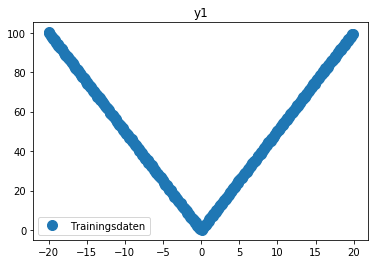

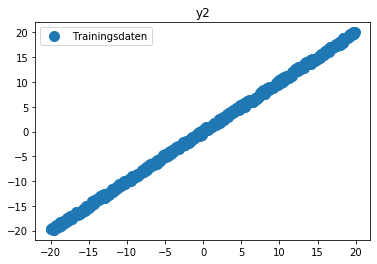

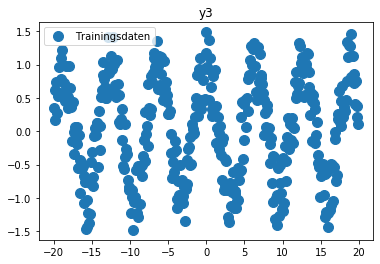

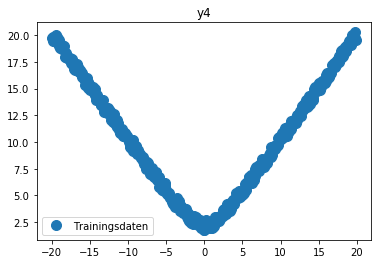

In [70]:
# Klassen-Methode daten_visualisieren() aufrufen und die Trainingsfunktionen ausgeben
trainingsdaten_objekt.daten_visualisieren() 

### 6. Testdaten 

In [14]:
# Klasse um die Testdaten aus der CSV-Datei zu laden und zu visualisieren
class Testdaten:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, pfad_Testdatensatz):
        self.Pfad_Testdatensatz = pfad_Testdatensatz
        
    # Klassen-Methode um die Testdaten aus der CSV-Datei test.csv zu laden
    def daten_laden(self):
        
        # Die Testdaten aus der CSV-Datei in einem DataFrame speichern
        df_Testdatensatz = pd.read_csv(self.Pfad_Testdatensatz)
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der CSV-Datei test.db
        assert df_Testdatensatz.shape == (100, 2), "Die Anzahl Zeilen und Spalten sollte 100 und 2 betragen."
        
        # Rückgabewert ist ein DataFrame mit den Testdaten
        return df_Testdatensatz
    
    # Klassen-Methode um die Testdaten zu visualisieren
    def daten_visualisieren(self):
        
        # Die Spalten x und y der Testdaten in jeweils einer Variablen abspeichern
        x_test = testdaten_objekt.daten_laden()['x']
        y_test = testdaten_objekt.daten_laden()['y']
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der CSV-Datei test.db
        assert x_test.shape == (100, ), "Die Anzahl Zeilen und Spalten sollte 100 und 'leer' betragen."
        assert y_test.shape == (100, ), "Die Anzahl Zeilen und Spalten sollte 100 und 'leer' betragen."
        
        # Visualisierung der Testdaten
        plt.plot(x_test, y_test, 'o', label='Testdaten', markersize=10)
        plt.title("Testdatensatz")
        plt.legend()
        plt.show()

##### 6.1 Testdaten als Tabelle ausgeben

In [15]:
# Objekt der Klasse Testdaten erstellen
testdaten_objekt = Testdaten(pfad_Testdatensatz)

# Unittest zur Überprüfung der Anzahl Zeilen und Spalten der CSV-Datei test.db
assert testdaten_objekt.daten_laden().shape == (100, 2), "Die Anzahl Zeilen und Spalten sollte 100 und 2 betragen."

# Klassen-Methode daten_laden() aufrufen und die Testdaten ausgeben
testdaten_objekt.daten_laden()

,x,y
0,4.9,4.496336
1,-4.7,34.250820
2,7.2,6.698579
3,17.9,17.754583
4,-6.5,81.214020
...,...,...
95,0.1,1.154942
96,-20.0,-19.347134
97,-15.3,0.214379
98,-3.2,-3.739082


##### 6.2 Testdaten visualisieren

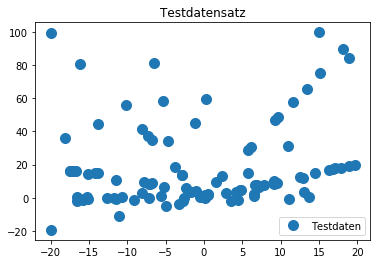

In [16]:
# Klassen-Methode daten_visualisieren() aufrufen und die Testdaten darstellen
testdaten_objekt.daten_visualisieren()

### 7. Ideale Funktionen  

In [18]:
# Klasse um die 50 idealen Funktionen aus der Datenbanktabelle Funktionen.db zu laden und zu visualisieren
class Funktionen:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, funktionen):
        self.Funktionen = funktionen
        self.df_Funktionen = pd.DataFrame()
        
    # Klassen-Methode um die idealen Funktionen aus der Datenbank Funktionen.db zu laden
    def daten_laden(self):
        
        # Selektor generieren
        query_Funktionen = db.select([self.Funktionen])
        
        # Selektion durchführen
        ResultProxy_Funktionen = datenbank_train_ideal_objekt.connection_Funktionen.execute(query_Funktionen)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Funktionen) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Funktionen = ResultProxy_Funktionen.fetchall()
        
        # Die Daten aus der Datenbanktabelle Funktionen.db in einem DataFrame abspeichern
        self.df_Funktionen = pd.DataFrame(ResultSet_Funktionen)
        
        #
        self.df_Funktionen.columns = ResultSet_Funktionen[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Funktionen.db
        assert self.df_Funktionen.shape == (400, 51), "Die Anzahl Zeilen und Spalten sollte 400 und 51 betragen."
        
        # Rückgabewert ist ein DataFrame mit den idealen Funktionen
        return self.df_Funktionen
    
    # Klassen-Methode um die 50 idealen Funktionen zu visualisieren
    def ideale_Funktionen_visualisieren(self):
        
        # Speicherung der Spalte x und alle ideale Funktionen y1-50 in Variablen
        x = self.df_Funktionen['x']
        y = self.df_Funktionen.iloc[:, 1:51]
        
        # Unittest's zur Überprüfung der Anzahl Zeilen und Spalten des DataFrame mit den idealen Funktionen
        assert x.shape == (400, ), "Die Anzahl Zeilen und Spalten sollte 400 und 'leer' betragen."
        assert y.shape == (400, 50), "Die Anzahl Zeilen und Spalten sollte 400 und 51 betragen."
        
        """
        for-Schleife zur Ausgabe aller 50 idealen Funktionen.
        Angefangen wird dabei bei Spalte 2 des DataFrame da dies y1 ist und läuft bis zur 51. Spalte  
        und geht in 1er Schritten vorwärts, daher range(1, 51, 1).
        """
        for i in range(1, 51, 1):
            
            # Visualisierung der 50 idealen Funktionen
            plt.plot(x, self.df_Funktionen.iloc[:, i:i+1], 'o', label='ideale Funktion', markersize=10)
            plt.title('y%i' %i)
            plt.legend()
            plt.show()

##### 7.1 Die x-Werte und die 50 idealen Funktionen in einer Tabelle ausgeben

In [19]:
# Objekt der Klasse Funktionen erstellen
funktionen_objekt = Funktionen(datenbank_train_ideal_objekt.Funktionen) 

# Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Funktionen.db
assert funktionen_objekt.daten_laden().shape == (400, 51), "Die Anzahl Zeilen und Spalten \
                                                            sollte 400 und 51 betragen."

# Klassen-Methode daten_laden() aufrufen und die idealen Funktionen ausgeben
funktionen_objekt.daten_laden()                                

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,...,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
396,19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,...,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
397,19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,...,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840
398,19.8,0.813674,0.581322,10.813674,5.581322,-10.813674,-0.813674,-0.889191,0.612391,1.162644,...,40.006836,-39.309338,2.985682,-0.012469,12.985682,5.288267,-5.288267,0.236503,0.813674,0.549129


###### 7.2 Die 50 idealen Funktionen visualisieren

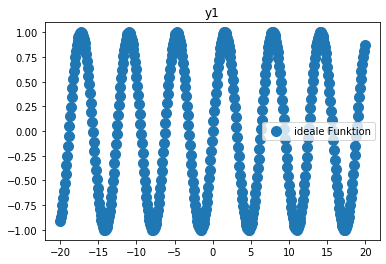

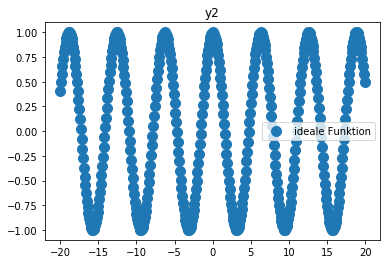

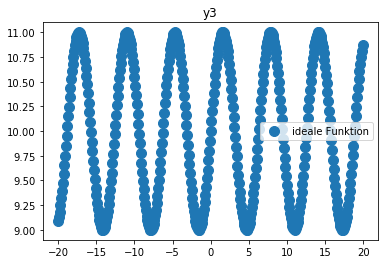

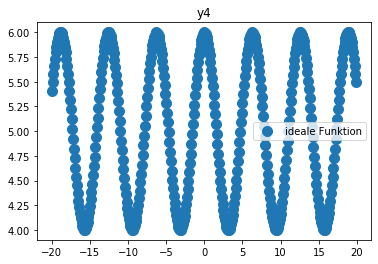

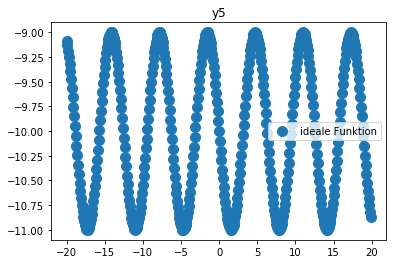

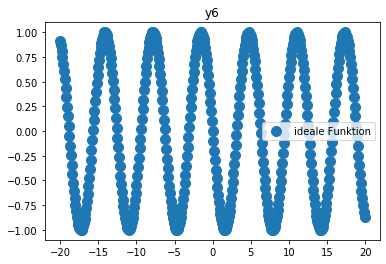

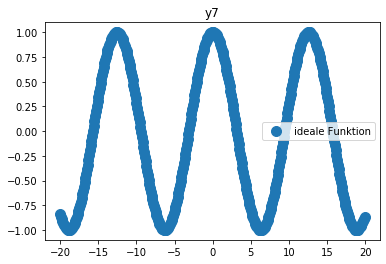

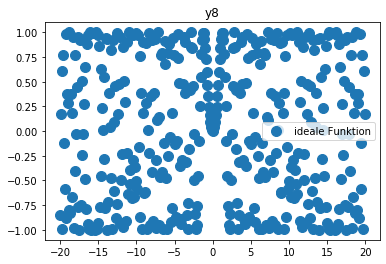

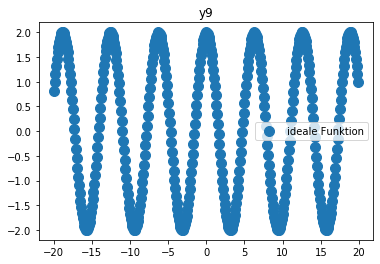

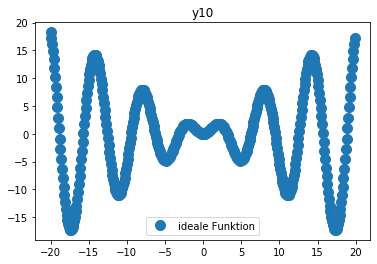

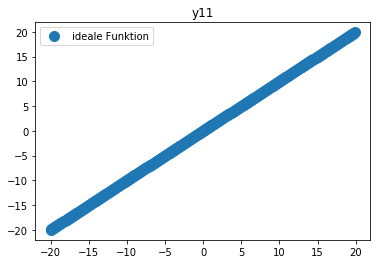

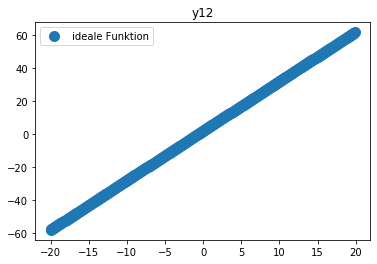

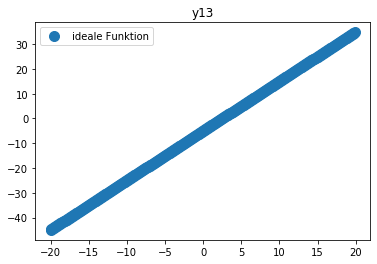

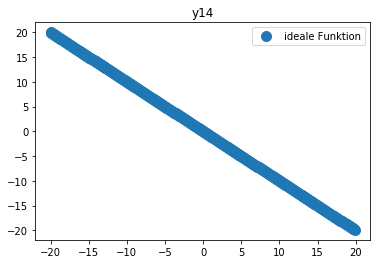

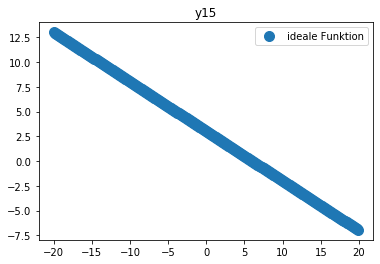

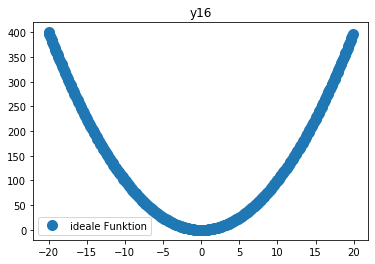

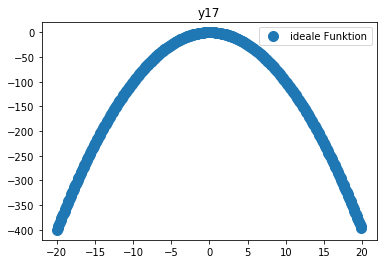

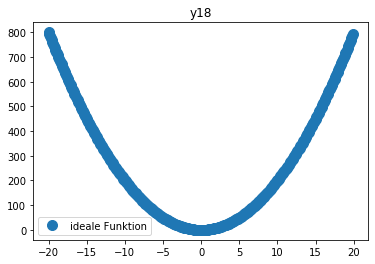

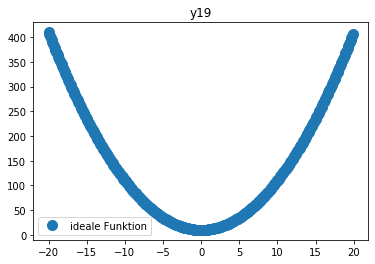

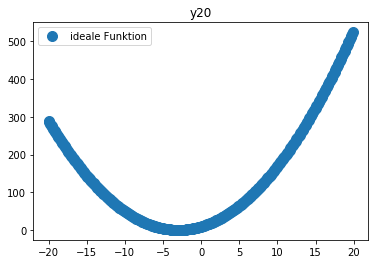

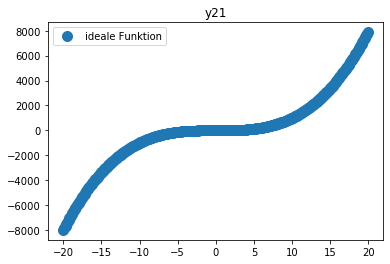

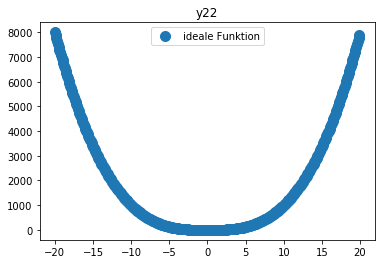

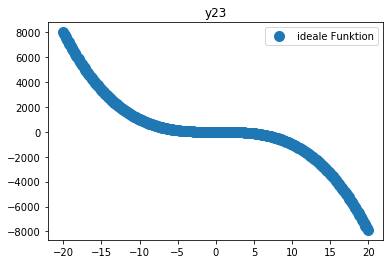

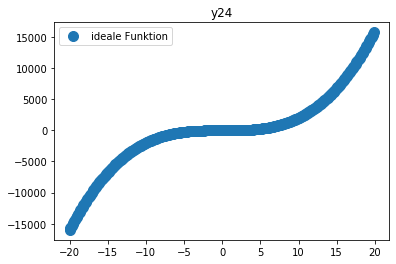

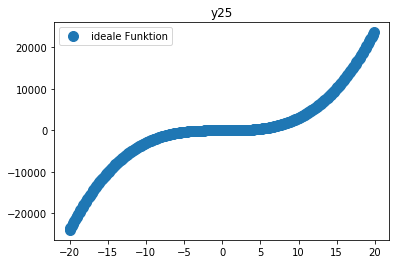

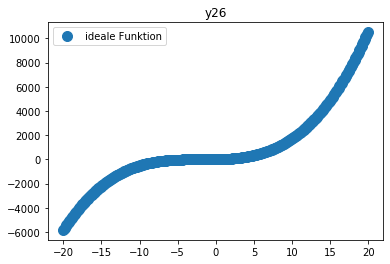

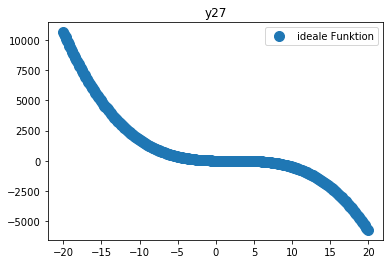

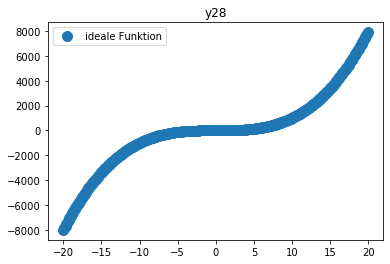

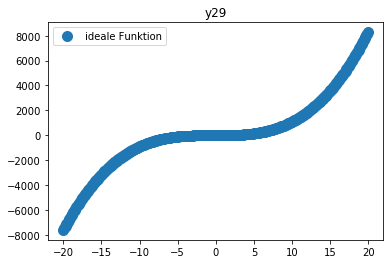

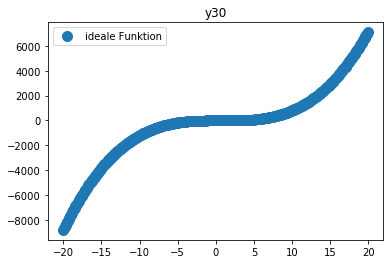

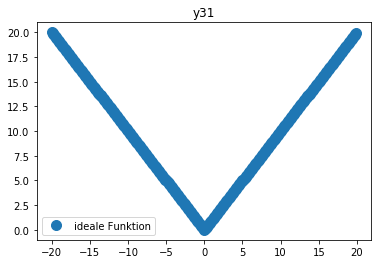

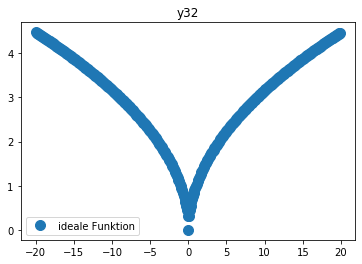

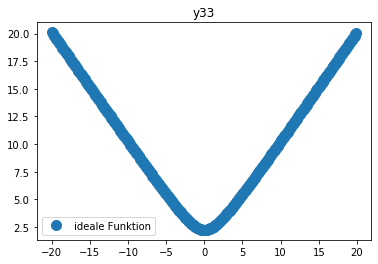

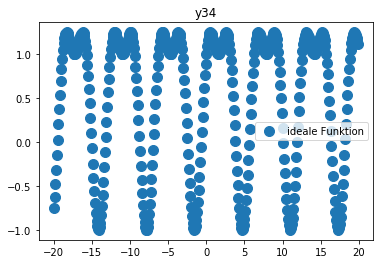

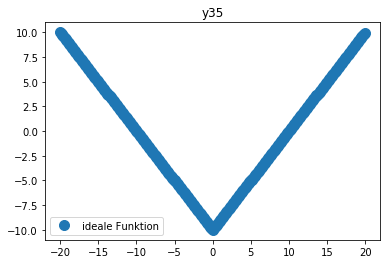

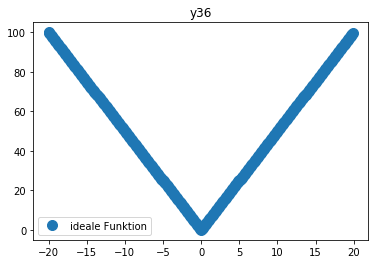

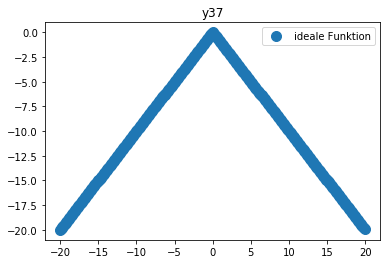

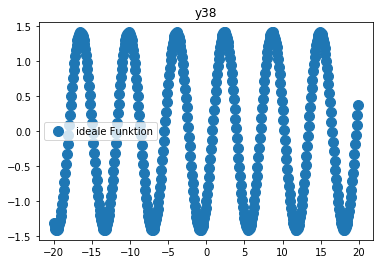

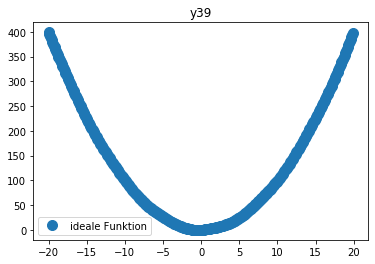

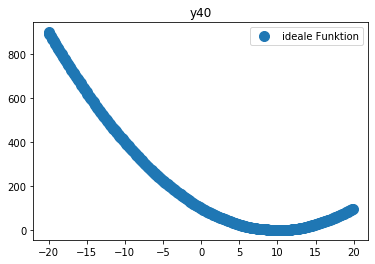

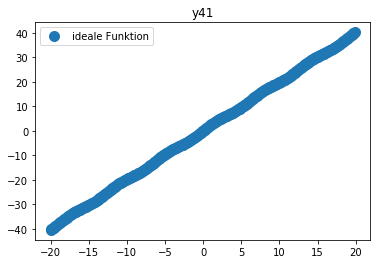

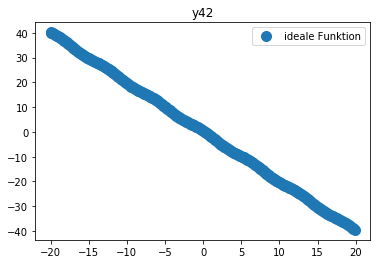

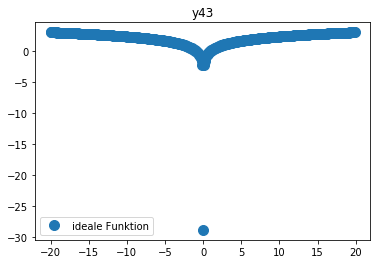

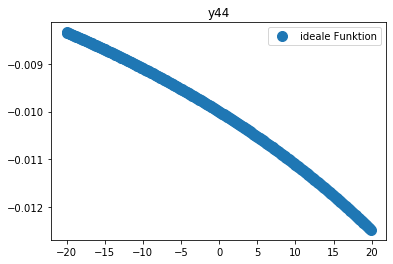

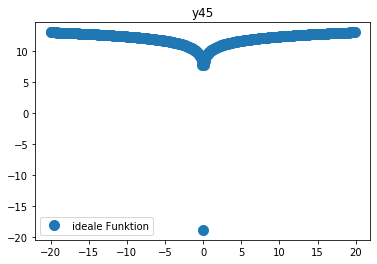

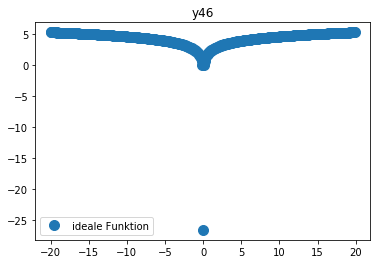

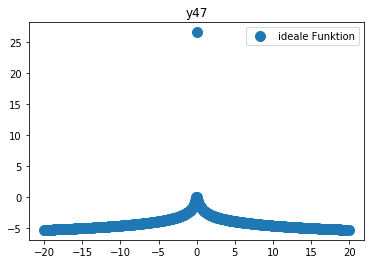

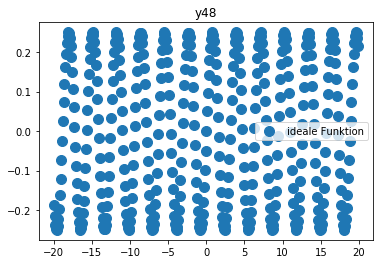

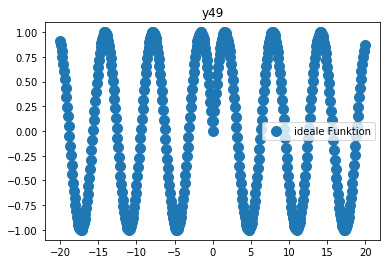

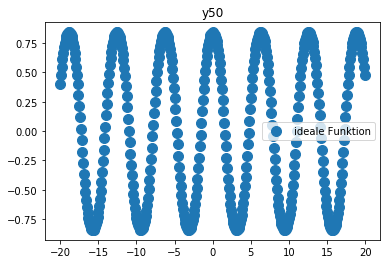

In [20]:
# Klassen-Methode ideale_Funktionen_visualisieren() aufrufen und die idealen Funktionen darstellen
funktionen_objekt.ideale_Funktionen_visualisieren()

### 8. Die vier passenden idealen Funktionen finden

In [21]:
# Klasse um die vier passenden idealen Funktionen zu finden und diese zu visualisieren
class Funktion_1:
    
    # Konstruktor um die Variablen zu initalisieren
    def __init__(self, x_train, y_train, train_funktionsnummer):
        self.X_train = x_train
        self.Y_train = y_train
        self.Train_funktionsnummer = train_funktionsnummer
        
    # Klassen-Methode um die Steigung (m) und den y-Achsenabschnitt (c) der vier Trainingsfunktionen zu bestimmen
    def train_Funktion_erstellen(self):
        
        # Die Trainingsdaten zeilenweise stapeln
        a = np.vstack([self.X_train, np.ones(len(self.X_train))]).T
        
        # Berechnung der Steigung (m) und des y-Achsenabschnitts (c) mittels der Methode der kleinsten Quadrate
        m_train, c_train = np.linalg.lstsq(a, self.Y_train, rcond=None)[0]
        
        # Rückgabewert ist die Steigung (m) und der y-Achsenabschnitt (c) der vier Trainingsfunktionen
        return m_train, c_train
    
    # Klassen-Methode um die Trainingsdaten und die vier Trainingsfunktionen zu visualisieren
    def train_Funktion_visualisieren(self):
        
        # Visualisierung der Trainingsdaten mit ihren Trainingsfunktionen
        plt.plot(self.X_train, self.Y_train, 'o', label='Trainingsdaten', markersize=10)
        plt.plot(self.X_train, self.train_Funktion_erstellen()[0]*self.X_train + self.train_Funktion_erstellen()[1], 'r', label='Trainingsfunktion')
        plt.title((self.Train_funktionsnummer ,"_train =", self.train_Funktion_erstellen()[0], "* x +", self.train_Funktion_erstellen()[1]))
        plt.legend()
        plt.show()
        
    # Klassen-Methode um die vier idealen Funktionen zu finden
    def ideale_Funktion_finden(self):
        
        # Die Trainingsdaten zeilenweise stapeln
        a_ideal = np.vstack([self.X_train, np.ones(len(self.X_train))]).T
        
        # Listen um die Steigung (m) und y-Achsenabschnitte (c) der 50 idealen Funktionen zu speichern
        liste_m = []
        liste_c = []

        # Berechne die Steigung (m) und den y-Achsenabschnitt (c) von allen 50 idealen Funktionen
        for i in range(1, 51, 1):
            m_ideal, c_ideal = np.linalg.lstsq(a_ideal, funktionen_objekt.daten_laden().iloc[:, i:i+1], rcond=None)[0]
            
            """
            Differenzen zwischen den Steigungen (m) und y-Abschnitten (c) der vier Trainingsfunktionen und 
            den 50 idealen Funktionen berechnen
            """
            dev_m = self.train_Funktion_erstellen()[0] - m_ideal
            dev_c = self.train_Funktion_erstellen()[1] - c_ideal
       
            """
            Berechne wie weit entfernt die Differenzen der Steigungen (m) der vier Trainingsfunktionen und
            den 50 idealen Funktionen von der 0 entfernt ist um im weiteren Verlauf die geringste zu finden.
            """
            temp_m = 0-dev_m 
            liste_m.append(np.sqrt(np.dot(temp_m.T, temp_m)))

            """
            Berechne wie weit entfernt die Differenzen der y-Achsenabschnitte (c) der vier Trainingsfunktionen und
            den 50 idealen Funktionen von der 0 entfernt ist um im weiteren Verlauf die geringste zu finden.
            """
            temp_c = 0-dev_c
            liste_c.append(np.sqrt(np.dot(temp_c.T, temp_c)))
        
        
        """
        Addiere die jeweiligen Differenzen der Steigungen (m) und der y-Achsenabschnitte (c) jeder der 50 idealen
        Funktionen um im weiteren Verlauf die geringste Summe zu ermitteln und damit die passende ideale Funktion.
        """
        sum_m_c = [sum(i) for i in zip(liste_m,liste_c)]
            
        # Zähler für die Funktionsnummer
        cnt_y_ideal = 0 
        
        """
        for-Schleife zum durchlaufen der summierten Steigungen (m) und y-Achsenabschnitte (c) um die kleinste
        Summe zu finden und damit die vier passenden idealen Funktionen.
        """
        for i in sum_m_c:
             
            """
            Zähle die Funktionsnummer der idealen Funktion um eins hoch um die entsprechende Nummer der idealen
            Funktion zu erhalten.
            """
            cnt_y_ideal = cnt_y_ideal + 1
            
            """
            Finde den geringsten summierten Wert der Steigungen (m) und y-Achsenabschnitte (c), denn
            dieser ist dann am nächsten an der jeweiligen Trainingsfunktion und damit die passsende ideale
            Funktion.
            """
            if i == min(sum_m_c):
                
                # Berechne die Steigung (m) und den y-Achsenabschnitt (c) der vier ermittelten idealen Funktionen
                m_ideal, c_ideal = np.linalg.lstsq(a_ideal, 
                                                   funktionen_objekt.daten_laden().iloc[:, cnt_y_ideal],
                                                   rcond=None)[0]
                
                """
                Ist die ideale Funktion gefunden werden die folgenden Werte zurückgegeben:
                 - Werte der idealen Funktion mittels unktionen_laden_objekt.daten_laden().iloc[:, cnt_y_ideal]
                 - Nummer der idealen Funktion mittels cnt_y_ideal
                 - Steigung der idealen Funktion mittels m_ideal
                 - y-Achsenabschnitt der idealen Funktion mittels c_ideal
                """
                return funktionen_objekt.daten_laden().iloc[:, cnt_y_ideal], cnt_y_ideal, m_ideal, c_ideal
                    
    # Klassen-Methode um die vier gefundenen idealen Funktionen inklusive Trainingsdaten zu visualisieren
    def ideale_Funktion_visualisieren(self):
        
        # Visualisierung der Trainingsdaten und der vier gefundenen idealen Funktionen
        plt.plot(self.X_train, self.Y_train, 'o', label='Trainingsdaten', markersize=10)
        plt.plot(self.X_train, self.ideale_Funktion_finden()[2]*self.X_train + self.ideale_Funktion_finden()[3], 'r', label='Ideale Funktion')
        plt.title(("y",self.ideale_Funktion_finden()[1],"_ideal =",self.ideale_Funktion_finden()[2],"* x +",self.ideale_Funktion_finden()[3]))
        plt.legend()
        plt.show()
        
# Die Klasse funktion_2 bekommt alles von der Klasse funktion_1 vererbt
class Funktion_2(Funktion_1):
    pass # Es wird keine Operation ausgeführt

# Die Klasse funktion_3 bekommt alles von der Klasse funktion_1 vererbt
class Funktion_3(Funktion_1):
    pass # Es wird keine Operation ausgeführt

# Die Klasse funktion_4 bekommt alles von der Klasse funktion_1 vererbt
class Funktion_4(Funktion_1):
    pass # Es wird keine Operation ausgeführt

##### 8.1 Die Objekte der vier Klassen erstellen um die vier passenden idealen Funktionen zu finden

In [22]:
# Objekt der Klasse Funktion_1 erstellen
funktion_1_objekt = Funktion_1(trainingsdaten_objekt.daten_laden()['x'], 
                               trainingsdaten_objekt.daten_laden()['y1'], 
                               list(trainingsdaten_objekt.daten_laden())[1])

# Objekt der Klasse Funktion_2 erstellen
funktion_2_objekt = Funktion_2(trainingsdaten_objekt.daten_laden()['x'], 
                               trainingsdaten_objekt.daten_laden()['y2'], 
                               list(trainingsdaten_objekt.daten_laden())[2])

# Objekt der Klasse Funktion_3 erstellen
funktion_3_objekt = Funktion_3(trainingsdaten_objekt.daten_laden()['x'], 
                               trainingsdaten_objekt.daten_laden()['y3'], 
                               list(trainingsdaten_objekt.daten_laden())[3])

# Objekt der Klasse Funktion_4 erstellen
funktion_4_objekt = Funktion_4(trainingsdaten_objekt.daten_laden()['x'], 
                               trainingsdaten_objekt.daten_laden()['y4'], 
                               list(trainingsdaten_objekt.daten_laden())[4])

##### 8.2 Visualisierung der Trainingsdaten und der Trainingsfunktion y1

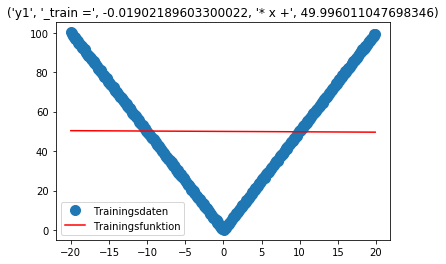

In [23]:
# Klassen-Methode train_Funktion_visualisieren() aufrufen und die erste Trainingsfunktion darstellen
funktion_1_objekt.train_Funktion_visualisieren()

##### 8.3 Visualisierung der Trainingsdaten und der ermittelten idealen Funktion y36

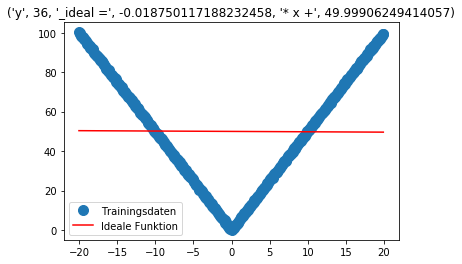

In [24]:
# Klassen-Methode ideale_Funktion_visualisieren() aufrufen und die ermittelte ideale Funktion darstellen
funktion_1_objekt.ideale_Funktion_visualisieren()

##### 8.4 Visualisierung der Trainingsdaten und der Trainingsfunktion y2

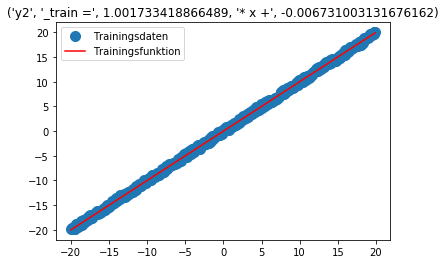

In [25]:
# Klassen-Methode train_Funktion_visualisieren() aufrufen und die erste Trainingsfunktion darstellen
funktion_2_objekt.train_Funktion_visualisieren()

##### 8.5 Visualisierung der Trainingsdaten und der ermittelten idealen Funktion y11

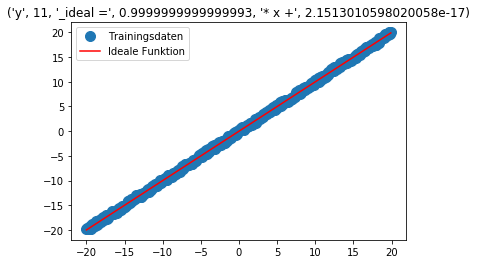

In [26]:
# Klassen-Methode ideale_Funktion_visualisieren() aufrufen und die ermittelte ideale Funktion darstellen
funktion_2_objekt.ideale_Funktion_visualisieren()

##### 8.6 Visualisierung der Trainingsdaten und der Trainingsfunktion y3

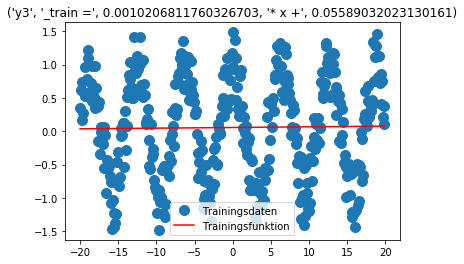

In [27]:
# Klassen-Methode train_Funktion_visualisieren() aufrufen und die erste Trainingsfunktion darstellen
funktion_3_objekt.train_Funktion_visualisieren()

##### 8.7 Visualisierung der Trainingsdaten und der ermittelten idealen Funktion y2

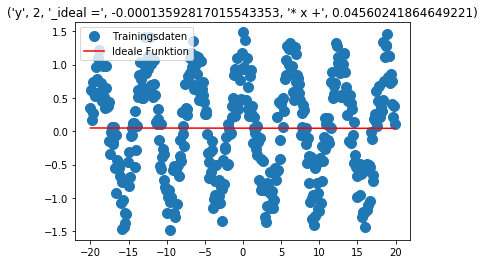

In [28]:
# Klassen-Methode ideale_Funktion_visualisieren() aufrufen und die ermittelte ideale Funktion darstellen
funktion_3_objekt.ideale_Funktion_visualisieren()

##### 8.8 Visualisierung der Trainingsdaten und der Trainingsfunktion y4

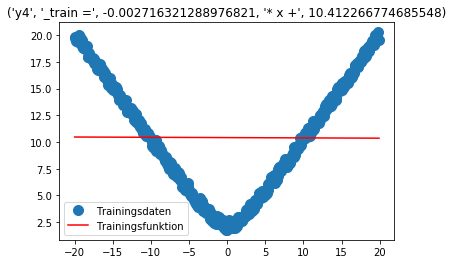

In [29]:
# Klassen-Methode train_Funktion_visualisieren() aufrufen und die erste Trainingsfunktion darstellen
funktion_4_objekt.train_Funktion_visualisieren()

##### 8.9 Visualisierung der Trainingsdaten und der ermittelten idealen Funktion y33

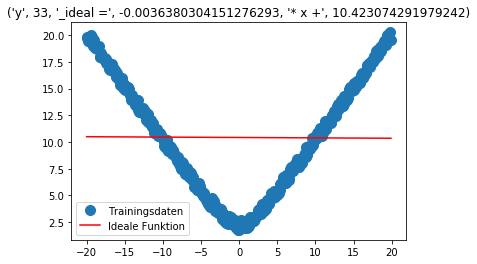

In [30]:
# Klassen-Methode ideale_Funktion_visualisieren() aufrufen und die ermittelte ideale Funktion darstellen
funktion_4_objekt.ideale_Funktion_visualisieren()

### 9. Ermittelte ideale Funktionen validieren

In [31]:
# Klasse um die vier passenden idealen Funktionen mit den Testdaten zu validieren 
class Funktion_1_testen:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, x_test, y_test, x_train, m_ideal, c_ideal, funktionsnummer):
        
        self.X_test = x_test
        self.Y_test = y_test
        self.X_train = x_train
        self.M_ideal = m_ideal
        self.C_ideal = c_ideal
        self.Funktionsnummer = funktionsnummer
        
    # Klassen-Methode um die vier ermittelten idealen Funktionen zusammen mit den Testdaten zu visualisieren
    def ideale_Funktion_in_Testdaten_visualisieren(self):
        
        # Visualisierung der Testdaten und der vier ermittelten idealen Funktionen
        plt.plot(self.X_test, self.Y_test, 'o', label='Testdaten', markersize=10)
        plt.plot(self.X_test, self.M_ideal*self.X_test + self.C_ideal, 'r', label='Ideale Funktion')
        plt.title(("Testdatensatz mit idealer Funktion y", self.Funktionsnummer))
        plt.legend()
        plt.show()
        
    # Klassen-Methode um die vier ausgewählten idealen Funktionen zu validieren 
    def ideale_Funktion_validieren(self):
        
        """
        Faktor Wurzel aus zwei (sqrt(2)) für die maximale Abweichung zwischen den vier 
        ermittelten idealen Funktionen und den Testwerten und zwischen den Trainingsdaten (A) und 
        den vier idealen Funktionen.
        """
        maximale_Abweichung = np.sqrt(2)
        
        """
        Die x-Werte aus dem Testdatensatz werden in die vier idealen Funktionen eingesetzt und
        in eine Liste geschrieben.
        """
        liste_y_x_test = []
        for x in self.X_test:
            y_x_test = self.M_ideal*x + self.C_ideal
            liste_y_x_test.append(y_x_test)

        """
        Die x-Werte aus dem Trainingsdatensatz werden in die vier idealen Funktionen eingesetzt und
        in eine Liste geschrieben.
        """
        liste_y_x_train = []
        for x in self.X_train:
            y_x_train = self.M_ideal*x + self.C_ideal
            liste_y_x_train.append(y_x_train)
        
        """
        Berechne die Abweichungen zwischen Trainingsdaten und der jeweiligen 
        Trainingsfunktion (y1, y2, y3, y4).
        """
        dev_y_x_train = [x1 - x2 for (x1, x2) in zip(self.X_train, liste_y_x_train)]
        
        """
        Berechne die Abweichungen zwischen Testdaten und der jeweiligen ermittelten 
        idealen Funktion (y36, y11, y2, y33).
        """
        dev_y_x_test = [x1 - x2 for (x1, x2) in zip(self.X_test, liste_y_x_test)]
        
        """
        Summiere die berechneten Abweichungen zwischen den Trainingsdaten und der jeweiligen
        Trainingsfunktion (y1, y2, y3, y4).
        """
        sum_dev_y_x_train = sum(dev_y_x_train)
        
        """
        Summiere die berechneten Abweichungen zwischen den Testdaten und der jeweiligen ermittelten
        idealen Funktion (y36, y11, y2, y33).
        """
        sum_dev_y_x_test = sum(dev_y_x_test)

        """
        Berechne die Anzahl der Elemente in der Liste mit den Abweichungen den Trainingsdaten und der 
        jeweiligen Trainingsfunktion (y1, y2, y3, y4).
        """
        len_dev_y_x_train = len(dev_y_x_train)
        
        """
        Berechne die Anzahl der Elemente in der Liste mit den Abweichungen den Testdaten und der 
        jeweiligen idealen Funktion (y36, y11, y2, y33).
        """
        len_dev_y_x_test = len(dev_y_x_test)
        
        """
        Berechne den Mittelwert der Abweichungen zwischen den Trainingsdaten und der 
        jeweiligen Trainingsfunktion (y1, y2, y3, y4).
        """
        mittelwert_dev_y_x_train = sum_dev_y_x_train / len_dev_y_x_train
        
        """
        Berechne den Mittelwert der Abweichungen zwischen den Testdaten und der 
        jeweiligen idealen Funktion (y36, y11, y2, y33).
        """
        mittelwert_dev_y_x_test = sum_dev_y_x_test / len_dev_y_x_test

        # Berechne den Faktor um den die beiden berechneten Mittelwerte auseinander liegen
        faktor = mittelwert_dev_y_x_test / mittelwert_dev_y_x_train
        
        # Schreibe die Funktionsnummer der idealen 100 mal in eine Liste für die Ergebnistabelle
        liste_funktionsnummer = []
        for i in range(0, 100, 1):
            liste_funktionsnummer.append(self.Funktionsnummer)
        
        # Prüfe ob der berechnete Faktor den Wert von sqrt(2) übersteigt
        if -maximale_Abweichung < faktor < maximale_Abweichung:
            
            # Berechnung der Differenz zwischen den y-Werten der idealen Funktionen ohne angepasste Werte 
            delta_y_ohne_Anpassung = [x1 - x2 for (x1, x2) in zip(liste_y_x_test, liste_y_x_test)]
            
            """
            Die folgenden Werte werden zurückgegeben:
             - Die eingesetzten x-Werte aus dem Testdatensatz mittels self.X_test
             - Die berechnete ideale Funktion durch die Einsetzung der x-Werte aus dem Testdatensatz 
               mittels liste_y_x_test
             - Die Differenzen zwischen den y-Werten der idealen Funktionen ohne das die x-Werte an die
               ideale Funktion angepasst werden mussten erfolgt mittels delta_y_ohne_Anpassung, womit die 
               Differenz hier 0 beträgt, da der Faktor von sqrt(2) nicht überschritten wurde
             - Die Funktionsnummer wird in liste_funktionsnummer gespeichert
            """
            return self.X_test, liste_y_x_test, delta_y_ohne_Anpassung, liste_funktionsnummer   
        
        # Der berechnete Faktor übersteigt den Wert sqrt(2) und die Testdaten müssen an die 
        # idealen Funktionen angepasst werden
        else:
            # Berechne den notwendigen Mittelwert für die Anpassung der Testdaten
            notwendiger_mittelwert_dev_y_x_test = maximale_Abweichung * mittelwert_dev_y_x_train
            
            # Berechne die neuen x-Werte des Testdatensatzes
            neue_x_werte_test = [notwendiger_mittelwert_dev_y_x_test * x for x in liste_y_x_test]

            """
            Setze die neuen x-Werte aus dem Testdatensatz in die idealen Funktionen ein bei
            denen der Faktor zu hoch war und schreibe diese in eine Liste.
            """
            liste_y_x_test_NEU = []
            for x in neue_x_werte_test:
                y_x_test_NEU = self.M_ideal*x + self.C_ideal
                liste_y_x_test_NEU.append(y_x_test_NEU)

            """
            Berechne die Abweichungen zwischen den neuen Testdaten und der idealen Funktionen bei
            denen der Faktor zu hoch war (y11, y2). 
            """
            dev_y_x_test_y_x_test_NEU = [x1 - x2 for (x1, x2) in zip(neue_x_werte_test, liste_y_x_test_NEU)]
            
            """
            Summiere die berechneten Abweichungen zwischen den neuen Testdaten und der idealen Funktion bei 
            denen der Faktor zu hoch war (y11, y2).
            """
            sum_dev_y_x_test_NEU = sum(dev_y_x_test_y_x_test_NEU)
        
            """
            Berechne die Anzahl der Elemente in der Liste mit den Abweichungen den neuen Testdaten und
            der idealen Funktion bei denen der Faktor zu hoch war (y11, y2).
            """
            len_dev_y_x_test_NEU = len(dev_y_x_test_y_x_test_NEU)
            
            """
            Berechne den Mittelwert der Abweichungen zwischen den neuen Testdaten und 
            der idealen Funktion bei denen der Faktor zu hoch war (y11, y2).
            """
            mittelwert_dev_y_x_test_NEU = sum_dev_y_x_test_NEU / len_dev_y_x_test_NEU
            
            # Berechne den neuen Faktor um den die beiden berechneten Mittelwerte auseinander liegen
            faktor_NEU = mittelwert_dev_y_x_test_NEU / mittelwert_dev_y_x_train
            
            # Prüfe ob der neue berechnete Faktor den Wert von sqrt(2) übersteigt
            if -maximale_Abweichung < faktor_NEU < maximale_Abweichung:
                """
                Berechnung der Differenz zwischen den y-Werten der idealen Funktionen mit und 
                ohne angepasste Werte.
                """
                delta_y_mit_Anpasssung = [x1 - x2 for (x1, x2) in zip(liste_y_x_test, liste_y_x_test_NEU)]
                
                """
                Die folgenden Werte werden zurückgegeben:
                 - Die eingesetzten x-Werte aus dem Testdatensatz mittels self.X_test
                 - Die neu berechnete ideale Funktion durch die Einsetzung der neuen x-Werte aus dem Testdatensatz 
                   mittels liste_y_x_test
                 - Die Differenzen zwischen den y-Werten der idealen Funktionen mit den alten und den neuen
                   x-Werten erfolgt mittels delta_y_mit_Anpassung, womit die Differenz hier ungleich 0 beträgt, 
                   da der Faktor von sqrt(2) überschritten wurde
                 - Die Funktionsnummer wird in liste_funktionsnummer gespeichert
                """
                return self.X_test, liste_y_x_test_NEU, delta_y_mit_Anpasssung, liste_funktionsnummer    
            
            # Der neu berechnete Faktor übersteigt den Wert von sqrt(2)
            else:
                print("Eine Anpassung der neuen x-Werte an die ideale Funktion war nicht erfolgreich gewesen, \
                       denn der neue Faktor ist immer noch größer als Wurzel aus 2 (sqrt(2)).")
                
# Die Klasse Funktion_2_testen bekommt alles von der Klasse Funktion_1_testen vererbt
class Funktion_2_testen(Funktion_1_testen):
    pass # Es wird keine Operation ausgeführt

# Die Klasse Funktion_3_testen bekommt alles von der Klasse Funktion_1_testen vererbt
class Funktion_3_testen(Funktion_1_testen):
    pass # Es wird keine Operation ausgeführt

# Die Klasse Funktion_4_testen bekommt alles von der Klasse Funktion_1_testen vererbt
class Funktion_4_testen(Funktion_1_testen):
    pass # Es wird keine Operation ausgeführt

##### 9.1 Die Objekte der vier Klassen erstellen um die vier passenden idealen Funktionen zu validieren

In [32]:
# Objekt der Klasse Funktion_1_testen erstellen 
funktion_1_testen_objekt = Funktion_1_testen(testdaten_objekt.daten_laden()['x'], 
                                             testdaten_objekt.daten_laden()['y'],
                                             trainingsdaten_objekt.daten_laden()['x'], 
                                             funktion_1_objekt.ideale_Funktion_finden()[2], 
                                             funktion_1_objekt.ideale_Funktion_finden()[3], 
                                             funktion_1_objekt.ideale_Funktion_finden()[1])

# Objekt der Klasse Funktion_2_testen erstellen 
funktion_2_testen_objekt = Funktion_2_testen(testdaten_objekt.daten_laden()['x'],
                                             testdaten_objekt.daten_laden()['y'],
                                             trainingsdaten_objekt.daten_laden()['x'], 
                                             funktion_2_objekt.ideale_Funktion_finden()[2], 
                                             funktion_2_objekt.ideale_Funktion_finden()[3], 
                                             funktion_2_objekt.ideale_Funktion_finden()[1])

# Objekt der Klasse Funktion_3_testen erstellen 
funktion_3_testen_objekt = Funktion_3_testen(testdaten_objekt.daten_laden()['x'],
                                             testdaten_objekt.daten_laden()['y'],
                                             trainingsdaten_objekt.daten_laden()['x'], 
                                             funktion_3_objekt.ideale_Funktion_finden()[2], 
                                             funktion_3_objekt.ideale_Funktion_finden()[3], 
                                             funktion_3_objekt.ideale_Funktion_finden()[1])

# Objekt der Klasse Funktion_4_testen erstellen 
funktion_4_testen_objekt = Funktion_4_testen(testdaten_objekt.daten_laden()['x'],
                                             testdaten_objekt.daten_laden()['y'],
                                             trainingsdaten_objekt.daten_laden()['x'], 
                                             funktion_4_objekt.ideale_Funktion_finden()[2], 
                                             funktion_4_objekt.ideale_Funktion_finden()[3], 
                                             funktion_4_objekt.ideale_Funktion_finden()[1])

##### 9.2 Visualisierung der ermittelten idealen Funktion y36 und der Testdaten

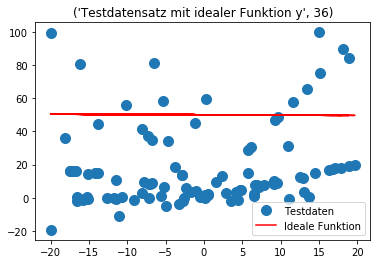

In [33]:
# Klassen-Methode ideale_Funktion_in_Testdaten_visualisieren() aufrufen und die ermittelte ideale Funktion 
# darstellen 
funktion_1_testen_objekt.ideale_Funktion_in_Testdaten_visualisieren()

##### 9.3 Visualisierung der ermittelten idealen Funktion y11 und der Testdaten

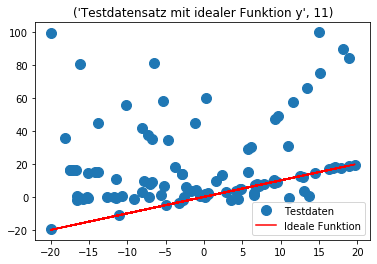

In [34]:
# Klassen-Methode ideale_Funktion_in_Testdaten_visualisieren() aufrufen und die ermittelte ideale Funktion 
# darstellen
funktion_2_testen_objekt.ideale_Funktion_in_Testdaten_visualisieren()

##### 9.4 Visualisierung der ermittelten idealen Funktion y2 und der Testdaten

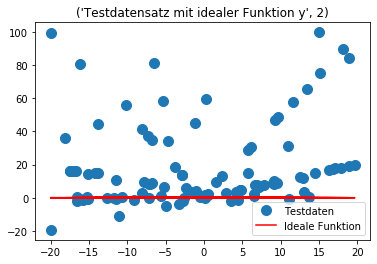

In [35]:
# Klassen-Methode ideale_Funktion_in_Testdaten_visualisieren() aufrufen und die ermittelte ideale Funktion 
# darstellen
funktion_3_testen_objekt.ideale_Funktion_in_Testdaten_visualisieren()

##### 9.5 Visualisierung der ermittelten idealen Funktion y33 und der Testdaten

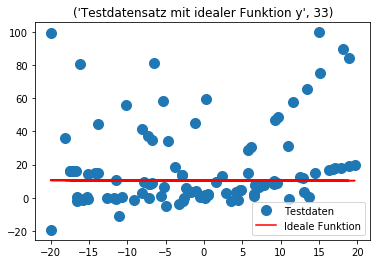

In [36]:
# Klassen-Methode ideale_Funktion_in_Testdaten_visualisieren() aufrufen und die ermittelte ideale Funktion 
# darstellen
funktion_4_testen_objekt.ideale_Funktion_in_Testdaten_visualisieren()

### 10. Ergebnisse in die Datenbanktabelle Ergebnisse.db schreiben

In [37]:
# Klasse um die Ergebnisse in die Datenbanktabelle Ergebnisse.db zu schreiben
class Datenbank_Ergebnisse:
    
    # Konstruktor um die Variablen zu initialisieren
    def __init__(self, x_test_funktion1, y1_test_funktion1, delta_y1, nr_ideale_funktion1,
                       x_test_funktion2, y1_test_funktion2, delta_y2, nr_ideale_funktion2,
                       x_test_funktion3, y1_test_funktion3, delta_y3, nr_ideale_funktion3,
                       x_test_funktion4, y1_test_funktion4, delta_y4, nr_ideale_funktion4):
        
        # Werte der idealen Funktion y36
        self.X_Test_Funktion1 = x_test_funktion1
        self.Y1_Test_Funktion1 = y1_test_funktion1
        self.Delta_y1 = delta_y1
        self.nr_ideale_Funktion1 = nr_ideale_funktion1
        
        # Werte der idealen Funktion y11
        self.X_Test_Funktion2 = x_test_funktion2
        self.Y1_Test_Funktion2 = y1_test_funktion2
        self.Delta_y2 = delta_y2
        self.nr_ideale_Funktion2 = nr_ideale_funktion2
        
        # Werte der idealen Funktion y2
        self.X_Test_Funktion3 = x_test_funktion3
        self.Y1_Test_Funktion3 = y1_test_funktion3
        self.Delta_y3 = delta_y3
        self.nr_ideale_Funktion3 = nr_ideale_funktion3
        
        # Werte der idealen Funktion y33
        self.X_Test_Funktion4 = x_test_funktion4
        self.Y1_Test_Funktion4 = y1_test_funktion4
        self.Delta_y4 = delta_y4
        self.nr_ideale_Funktion4 = nr_ideale_funktion4
        
        # Engine-Objekte erzeugen
        self.engine_Ergebnisse = db.create_engine('sqlite:///Ergebnisse.db')
        self.connection_Ergebnisse = self.engine_Ergebnisse.connect()
        self.meta_data_Ergebnisse = db.MetaData()
        
        # Datenbankstruktur für Ergebnisse.db
        self.Ergebnisse = db.Table("Ergebnisse", self.meta_data_Ergebnisse,        
                          db.Column("X (Test Funktion)", db.Float, nullable=False),
                          db.Column("Y1 (Test Funktion)", db.Float, nullable=False),
                          db.Column("Delta Y (Abweichung)", db.Float, nullable=False),
                          db.Column("Nummer der Idealen Funktion (FunkXX)", db.Integer, nullable=False))
        
    # Klassen-Methode um die Datenbanktabelle Ergebnisse.db zu erzeugen
    def tabelle_Ergebnisse_erzeugen(self):
        
        # Datenbanktabelle Ergebnisse.db erstellen 
        self.meta_data_Ergebnisse.create_all(self.engine_Ergebnisse)
     
    # Klassen-Methode um die Datenbanktabelle Ergebnisse.db mit den Ergebnissen zu befüllen
    def tabelle_Ergebnisse_befüllen(self):
        
        # x-Werte der vier ermittelten idealen Funktionen in einer Variablen zusammenfassen
        x_test_funktion_gesamt = list(self.X_Test_Funktion1) + \
                                 list(self.X_Test_Funktion2) + \
                                 list(self.X_Test_Funktion3) + \
                                 list(self.X_Test_Funktion4)
                    
        # y-Werte der vier ermittelten idealen Funktionen in einer Variablen zusammenfassen
        y1_test_funktion_gesamt = list(self.Y1_Test_Funktion1) + \
                                  list(self.Y1_Test_Funktion2) + \
                                  list(self.Y1_Test_Funktion3) + \
                                  list(self.Y1_Test_Funktion4)
                  
        """
        y-Abweichungen zwischen den vier ermittelten idealen Funktionen und 
        den Trainingsfunktionen in einer Variablen zusammenfassen.
        """
        delta_y_gesamt = list(self.Delta_y1) + \
                         list(self.Delta_y2) + \
                         list(self.Delta_y3) + \
                         list(self.Delta_y4)
        
        # Funktionsnummern der vier ermittelten idealen Funktionen in einer Variablen zusammenfassen
        nr_ideale_gesamt = list(self.nr_ideale_Funktion1) + \
                           list(self.nr_ideale_Funktion2) + \
                           list(self.nr_ideale_Funktion3) + \
                           list(self.nr_ideale_Funktion4)
        
        # Die vier zusammengefassten Variablen in entsprechende Spalten eines DataFrame schreiben
        df_ergebnisse = pd.DataFrame()
        df_ergebnisse['X (Test Funktion)'] = x_test_funktion_gesamt
        df_ergebnisse['Y1 (Test Funktion)'] = y1_test_funktion_gesamt
        df_ergebnisse['Delta Y (Abweichung)'] = delta_y_gesamt
        df_ergebnisse['Nummer der Idealen Funktion (FunkXX)'] = nr_ideale_gesamt
        
        # Das DataFrame für das Schreiben in die Datenbanktabelle entsprechend formatieren
        ergebnisse = df_ergebnisse.to_dict('records')
        
        # Der Tabelle Ergebnisse.db die Ergebnisse hinzufügen
        sql_query_Ergebnisse = db.insert(self.Ergebnisse)
        
        # Die insert-Anweisung ausführen
        result_Ergebnisse = self.connection_Ergebnisse.execute(sql_query_Ergebnisse, ergebnisse)
        
        
        """
        Prüfen ob die Daten in der Datenbanktabelle Ergebnisse.db die richtigen Dimensionen besitzen.
        """ 
        
        # Selektor generieren
        query_Ergebnisse = db.select([self.Ergebnisse])
        
        # Selektion durchführen
        ResultProxy_Ergebnisse = self.connection_Ergebnisse.execute(query_Ergebnisse)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Ergebnisse) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Ergebnisse = ResultProxy_Ergebnisse.fetchall()
        
        # Die Daten aus der Datenbank Ergebnisse.db in einem DataFrame abspeichern
        df_Ergebnisse = pd.DataFrame(ResultSet_Ergebnisse)
        
        #
        df_Ergebnisse.columns = ResultSet_Ergebnisse[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Ergebnisse.db
        assert df_Ergebnisse.shape == (400, 4), "Die Anzahl Zeilen und Spalten sollte 400 und 4 betragen."

##### 10.1 Objekt der  Klasse ergebnisse_formatieren erstellen 

In [38]:
# Objekt der Klasse Datenbank_Ergebnisse erstellen 
datenbank_ergebnisse_objekt = Datenbank_Ergebnisse(funktion_1_testen_objekt.ideale_Funktion_validieren()[0],
                                                   funktion_1_testen_objekt.ideale_Funktion_validieren()[1],
                                                   funktion_1_testen_objekt.ideale_Funktion_validieren()[2],
                                                   funktion_1_testen_objekt.ideale_Funktion_validieren()[3],
                                                   funktion_2_testen_objekt.ideale_Funktion_validieren()[0],
                                                   funktion_2_testen_objekt.ideale_Funktion_validieren()[1],
                                                   funktion_2_testen_objekt.ideale_Funktion_validieren()[2],
                                                   funktion_2_testen_objekt.ideale_Funktion_validieren()[3],
                                                   funktion_3_testen_objekt.ideale_Funktion_validieren()[0],
                                                   funktion_3_testen_objekt.ideale_Funktion_validieren()[1],
                                                   funktion_3_testen_objekt.ideale_Funktion_validieren()[2],
                                                   funktion_3_testen_objekt.ideale_Funktion_validieren()[3],
                                                   funktion_4_testen_objekt.ideale_Funktion_validieren()[0],
                                                   funktion_4_testen_objekt.ideale_Funktion_validieren()[1],
                                                   funktion_4_testen_objekt.ideale_Funktion_validieren()[2],
                                                   funktion_4_testen_objekt.ideale_Funktion_validieren()[3])

##### 10.2 Ergebnistabelle erzeugen

In [39]:
# Klassen-Methode tabelle_Ergebnisse_erzeugen() aufrufen
datenbank_ergebnisse_objekt.tabelle_Ergebnisse_erzeugen()

##### 10.3 Ergebnistabelle mit den Ergebnissen befüllen

In [40]:
# Klassen-Methode tabelle_Ergebnisse_befüllen() aufrufen
datenbank_ergebnisse_objekt.tabelle_Ergebnisse_befüllen()

### 11. Ergebnisse aus der Datenbanktabelle Ergebnisse.db laden

In [41]:
# Klasse um die Ergebnisse aus der Datenbanktabelle Ergebnisse.db zu laden
class Ergebnisse_laden: 
    
    # Konstruktor um die Variable zu initialisieren
    def __init__(self, ergebnisse):
        self.Ergebnisse = ergebnisse
        
    # Methode daten_laden(), um die Daten aus der Datenbank zu laden    
    def daten_laden(self):
        
        # Selektor generieren
        query_Ergebnisse = db.select([self.Ergebnisse])
        
        # Selektion durchführen
        ResultProxy_Ergebnisse = datenbank_ergebnisse_objekt.connection_Ergebnisse.execute(query_Ergebnisse)
        
        """
        Die Methode fetchall() holt alle Zeilen einer 
        Abfrageergebnismenge (ResultProxy_Ergebnisse) ab und 
        gibt eine Liste von Tupeln zurück. 
        """
        ResultSet_Ergebnisse = ResultProxy_Ergebnisse.fetchall()
        
        # Die Daten aus der Datenbank Ergebnisse.db in einem DataFrame abspeichern
        df_Ergebnisse = pd.DataFrame(ResultSet_Ergebnisse)
        
        #
        df_Ergebnisse.columns = ResultSet_Ergebnisse[0].keys()
        
        # Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Ergebnisse.db
        assert df_Ergebnisse.shape == (400, 4), "Die Anzahl Zeilen und Spalten sollte 400 und 4 betragen."
        
        # Rückgabewert ist ein DataFrame mit den Ergebnissen
        return df_Ergebnisse

##### 11.1 Die Ergebnistabelle ausgeben

In [42]:
# Objekt der Klasse Ergebnisse_laden erstellen 
ergebnisse_laden_objekt = Ergebnisse_laden(datenbank_ergebnisse_objekt.Ergebnisse)

# Unittest zur Überprüfung der Anzahl Zeilen und Spalten der Datenbanktabelle Ergebnisse.db
assert ergebnisse_laden_objekt.daten_laden().shape == (400, 4), "Die Anzahl Zeilen und Spalten \
                                                                 sollte 400 und 4 betragen."

# Klassen-Methode daten_laden() aufrufen
ergebnisse_laden_objekt.daten_laden()

,X (Test Funktion),Y1 (Test Funktion),Delta Y (Abweichung),Nummer der Idealen Funktion (FunkXX)
0,4.9,49.907187,0.0,36
1,-4.7,50.087188,0.0,36
2,7.2,49.864062,0.0,36
3,17.9,49.663435,0.0,36
4,-6.5,50.120938,0.0,36
...,...,...,...,...
395,0.1,10.422710,0.0,33
396,-20.0,10.495835,0.0,33
397,-15.3,10.478736,0.0,33
398,-3.2,10.434716,0.0,33
